In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from pydub.utils import mediainfo
import eyed3
import plotly.express as px
from tqdm import tqdm
import json
import sys
sys.path.append("../")


In [3]:
from bengali_asr.models import Whisper
from configs.whisper_characterwise_pretrained_augs import Configs
CFG = Configs([])

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


inference mode is on


In [4]:
from IPython.display import Audio, display

In [5]:
mdata = pd.read_csv("/app/dataset/metadata/train_metadata.csv")

In [6]:
audio = np.load("../../dataset/train_numpy_16k/f031736279b7.npy")
spectrogram = CFG.mel_transorm_valid(audio)

In [7]:
sr=16000

original audio


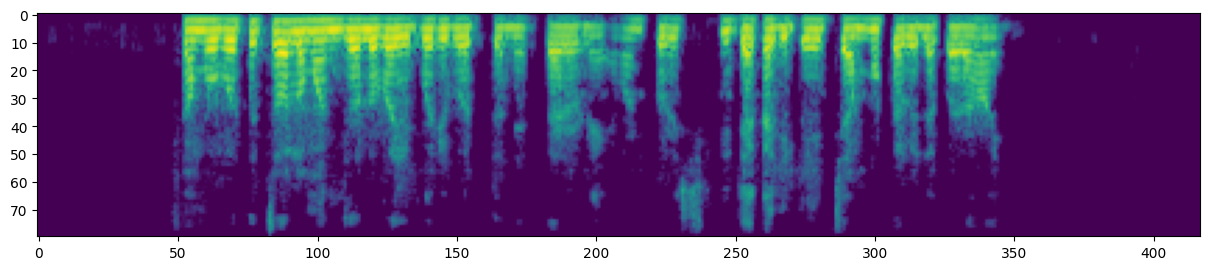

In [8]:
print("original audio")
display(Audio(audio, rate=16000))
plt.figure(figsize=(15,5))
plt.imshow(CFG.mel_transorm_valid[0](audio))

In [11]:
from bengali_asr.dataset.mel_augments import FrequencyMasking,TimeMasking
from bengali_asr.dataset.waveform_augments import GaussianNoise,TimeStretchAug,PitchShiftAug,ResampleAugmentation

In [12]:
from bengali_asr.audio import LogMelSpectrogramTransform,PadTruncateSpectrogram
from bengali_asr.dataset.transforms import ComposeAll

In [70]:
audio_transform_train = ComposeAll([
    ResampleAugmentation(p=0.5),
    GaussianNoise(p=0.5),
    # TimeStretchAug(p=1),
    # PitchShiftAug(p=1),
])
mel_transorm_train = ComposeAll([
    LogMelSpectrogramTransform(CFG.N_MELS,CFG.N_FFT,CFG.HOP_LENGTH,CFG.SAMPLE_RATE),
    FrequencyMasking(prob=0.5),
    TimeMasking(prob=0.5),
    PadTruncateSpectrogram(tensor_length=CFG.N_FRAMES)
])

10000


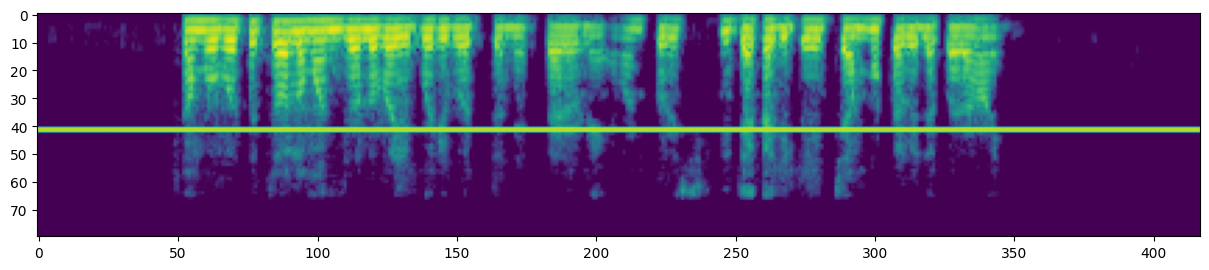

In [76]:
spg = mel_transorm_train(audio_transform_train(audio))
plt.figure(figsize=(15,5))
plt.imshow(spg)
plt.show()

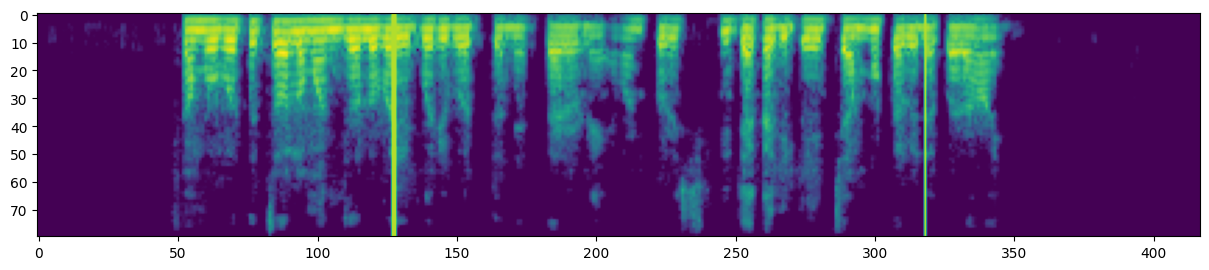

In [63]:
spg = mel_transorm_train(audio)
plt.figure(figsize=(15,5))
plt.imshow(spg)
plt.show()

In [16]:
import random

In [32]:
print("original audio")
display(Audio(audio_transform_train(audio), rate=16000))

original audio
10000


In [36]:
# for _ in tqdm(range(1000)):
#     spg = mel_transorm_train(audio_transform_train(audio),)

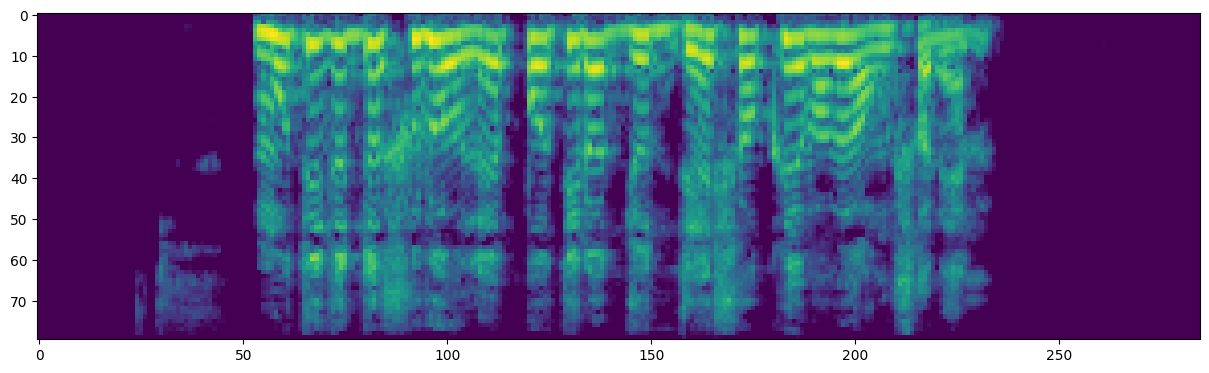

In [54]:
sr=16000
spg = mel_transorm_train(audio)
plt.figure(figsize=(15,5))
plt.imshow(spg)
plt.show()

In [57]:
audio[np.random.randint(0,len(audio),len(audio)*2).sort()].shape

(1, 67968)

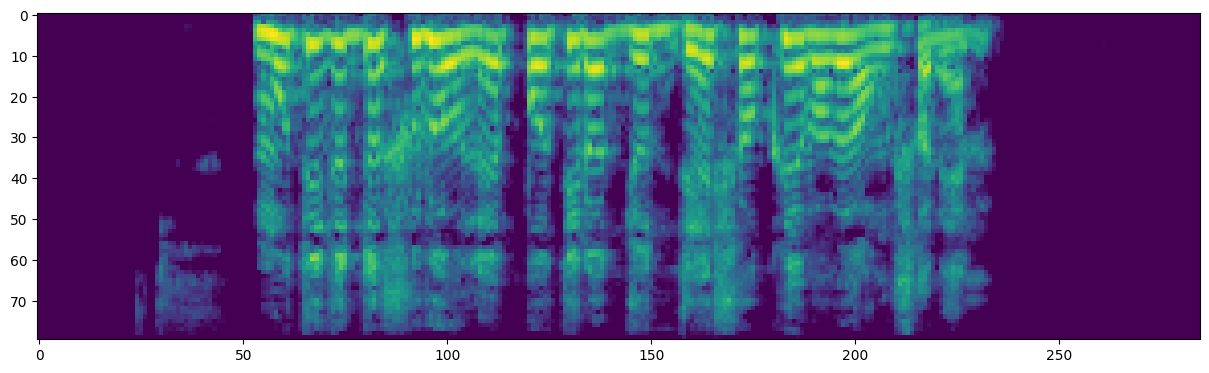

In [55]:
sr=16000
spg = mel_transorm_train(audio[np.random.randint(0,len(audio),len(audio)*2).sort()].reshape(-1))
plt.figure(figsize=(15,5))
plt.imshow(spg)
plt.show()